# TD 0 : Introduction à NumPy et Pandas

## Installation des packages

In [ ]:
! pip install numpy
! pip install seaborn
! pip install matplotlib
! pip install pandas

In [2]:
import numpy as np 
import seaborn as sb 
import pandas as pd 
import matplotlib.pyplot as plt

## 1. Introduction à Numpy

### Création de tableaux

In [3]:
t1 = np.geomspace(1, pow(10, 10), 11)
t2 = np.arange(0, 101, 2)
t3 = np.arange(0, -11, -1)
t1, t2, t3

(array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
        1.e+08, 1.e+09, 1.e+10]),
 array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
         26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
         52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
         78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]),
 array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10]))

### Création d'un échantillon de longueur 1000 suivant une loi exponentielle de paramètre 0.3

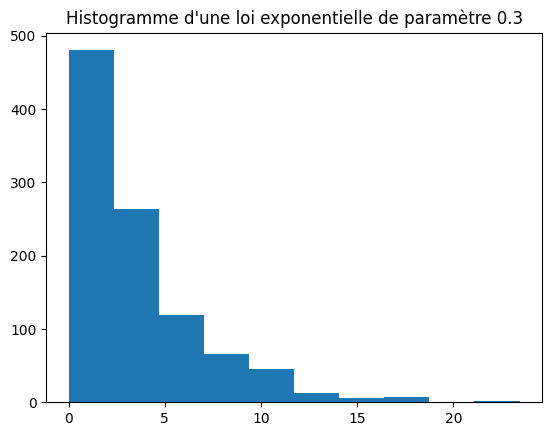

In [4]:
rng = np.random.default_rng()
expo = rng.exponential(scale = 1/0.3, size=1000)
plt.hist(expo)
plt.title("Histogramme d'une loi exponentielle de paramètre 0.3")
plt.show()

### Recalculer mean() et std() de manière mathématique

In [5]:
from math import sqrt
a = np.array([1, 2, 3])

mean = np.sum(a) / a.size
std = sqrt(np.sum((a - mean)**2) / a.size)
mean, std


(2.0, 0.816496580927726)

In [6]:
len(a)
# Donne le nombre d'éléments contenus dans le tableau

3

In [7]:
A1 = np.arange(1, 4, 1).reshape((3, 1))
A2 = np.array([-3, -2, -1])
A3 = np.full((3, 3), -2)
np.fill_diagonal(A3, 0)

A1, A2, A3

(array([[1],
        [2],
        [3]]),
 array([-3, -2, -1]),
 array([[ 0, -2, -2],
        [-2,  0, -2],
        [-2, -2,  0]]))

### Utilisation de la fonction reshape

In [8]:
A1 = np.arange(1, 9).reshape((2, 4))
A2 = np.arange(1, 9).reshape((4, 2)).T
A1, A2

(array([[1, 2, 3, 4],
        [5, 6, 7, 8]]),
 array([[1, 3, 5, 7],
        [2, 4, 6, 8]]))

### Fonction qui transforme une matrice colonne en une matrice ligne

In [9]:
def column_to_ligne(matrice : np.array):
    return matrice[:, np.newaxis]

column_to_ligne(np.arange(1, 5))

array([[1],
       [2],
       [3],
       [4]])

### Fonction qui renvoie une matrice transformée

In [10]:
def question8(A1 : np.array, A2 : np.array):
    if A1.ndim != 2 and A2.ndim != 2:
        raise ValueError("Les paramètres ne sont pas des matrices")
    if A1.shape[0] != A1.shape[1] and A2.shape[0] != A2.shape[1]:
        raise ValueError("Les paramètres ne sont pas des matrices carrées")
    first_big_rows = np.concatenate((A1, -A2), axis = 1)
    second_big_tows = np.concatenate((A2, A1), axis = 1)
    return np.concatenate((first_big_rows, second_big_tows), axis = 0)

question8(np.array([[1, 2], [3, 4]]), np.array([[4,5], [6,7]]))

array([[ 1,  2, -4, -5],
       [ 3,  4, -6, -7],
       [ 4,  5,  1,  2],
       [ 6,  7,  3,  4]])

In [11]:
def question9(A1 : np.array, v : np.array, nb : float):
    if v.shape[1] != 1 and v.shape[0] != A1.shape[0]:
        raise ValueError("v doit être un vecteur colonne de même nombre de ligne que A1")
    first_big_rows = np.concatenate((A1, v), axis = 1)
    second_big_tows = np.concatenate((v.T, np.array([nb]).reshape((1, 1))), axis = 1)
    return np.concatenate((first_big_rows, second_big_tows), axis = 0)

question9(np.array([[1, 2], [3, 4]]), np.arange(5, 7).reshape(2, 1), 10)

array([[ 1,  2,  5],
       [ 3,  4,  6],
       [ 5,  6, 10]])

### Fonction matrice circulante

In [12]:
def matrice_circulante(premiere_ligne):
    """Fonction qui renvoie la matrice circulante associée à la première ligne"""
    circulante = np.tile(premiere_ligne, (len(premiere_ligne), 1))
    for i in range(premiere_ligne.size):
        circulante[i, :] = np.roll(circulante[i, :], shift = i)
    return circulante

matrice_circulante(np.arange(1, 5))

array([[1, 2, 3, 4],
       [4, 1, 2, 3],
       [3, 4, 1, 2],
       [2, 3, 4, 1]])

### Création d'une matrice

In [14]:
def matrix(n, p):
    u = np.arange(1, n + 1).reshape(n, 1)
    v = np.arange(1, p + 1).reshape(p, 1)
    prod = np.matmul(u, v.T)
    return 1 / prod

matrix(4, 5)

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.25      , 0.16666667, 0.125     , 0.1       ],
       [0.33333333, 0.16666667, 0.11111111, 0.08333333, 0.06666667],
       [0.25      , 0.125     , 0.08333333, 0.0625    , 0.05      ]])

## 2. Découverte de Pandas

In [20]:
s1 = pd.read_csv("data/s1.csv", index_col=0).squeeze()
s1

preusuel
LUCAS      117001
EMMA       105209
ENZO        97980
LÉA         96491
HUGO        91960
            ...  
KELIAN       1984
JAD          1983
THELMA       1982
MANELLE      1981
KESSY        1972
Name: nombre, Length: 1000, dtype: int64

In [23]:
# Liste des prénoms donnés plus de 100000 fois
liste = s1[s1 > 100000]
before_sacha = s1[s1.index < "Sacha"]
liste, before_sacha

(preusuel
 LUCAS    117001
 EMMA     105209
 Name: nombre, dtype: int64,
 preusuel
 LUCAS      117001
 EMMA       105209
 ENZO        97980
 LÉA         96491
 HUGO        91960
             ...  
 MAËLINE      1987
 KELIAN       1984
 JAD          1983
 MANELLE      1981
 KESSY        1972
 Name: nombre, Length: 902, dtype: int64)